## DBSCAN

In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

### example

In [2]:
X_train, _ = make_blobs(random_state=0, n_samples=12)
print("X_train.shape:", X_train.shape)

X_train.shape: (12, 2)


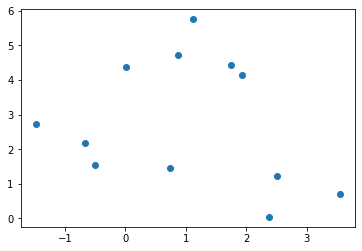

In [3]:
plt.scatter(X_train[:,0], X_train[:,1])

In [78]:
dbscan = DBSCAN()
dbscan.fit(X_train)

DBSCAN()

In [80]:
assignments_X_train = dbscan.labels_
print(assignments_X_train)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


#### all samples become noisy samples

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


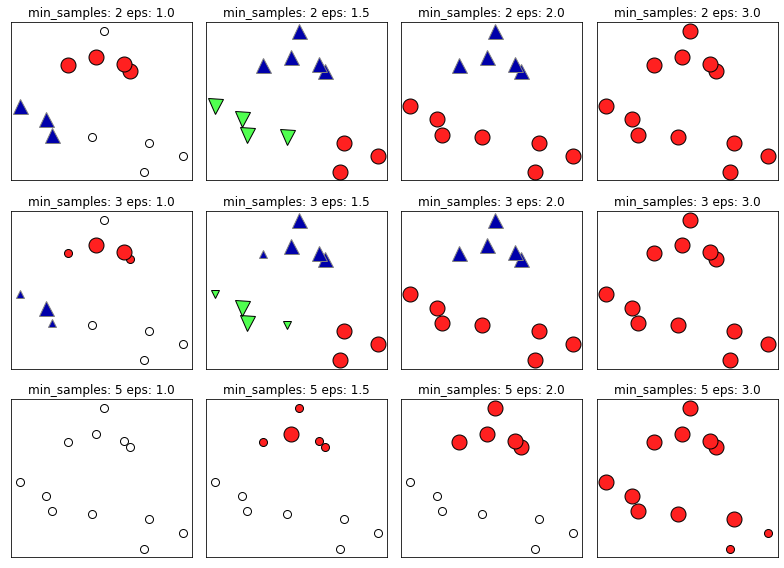

In [61]:
mglearn.plots.plot_dbscan()

### example with scaling

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

X_train, _ = make_blobs(random_state=0, n_samples=12)
print("X_train.shape:", X_train.shape)

X_train.shape: (12, 2)


In [5]:
scaler = MinMaxScaler((-1,1))
X_train_scaled = scaler.fit_transform(X_train)

In [6]:
dbscan = DBSCAN()
dbscan.fit(X_train_scaled)

DBSCAN()

In [7]:
assignments_X_train = dbscan.labels_
print(assignments_X_train)

[-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]


In [11]:
dbscan.components_

array([[-0.06402925,  0.63472699]])

## Clustering Evaluation (K-Means)

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [86]:
X, _ = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
) 

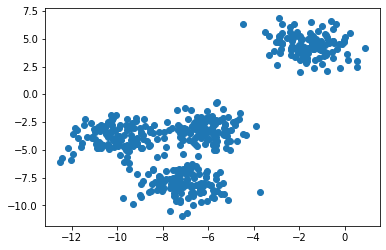

In [87]:
plt.scatter(X[:,0], X[:,1])

In [88]:
inertia = []
sil_scores = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, cluster_labels))
    

In [89]:
inertia

[3735.405674929567,
 1903.4503741659241,
 908.3855684760603,
 817.4470680159138,
 727.2600975739833,
 647.5238195990784,
 577.4713083206153,
 521.4112580528632]

In [90]:
sil_scores

[0.7049787496083262,
 0.5882004012129721,
 0.6505186632729437,
 0.56376469026194,
 0.4504666294372765,
 0.39092211029930857,
 0.33148538996489124,
 0.3349898818697859]

#### elbow method (heuristic)

Text(0.5, 1.0, 'K-Means Inertia')

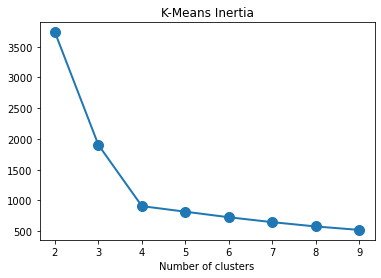

In [71]:
plt.plot(range(2,10), inertia, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

In [72]:
sil_scores

[0.7049787496083262,
 0.5882004012129721,
 0.6505186632729437,
 0.56376469026194,
 0.4504666294372765,
 0.39092211029930857,
 0.33148538996489124,
 0.3349898818697859]

Text(0.5, 1.0, 'Silhouette Score')

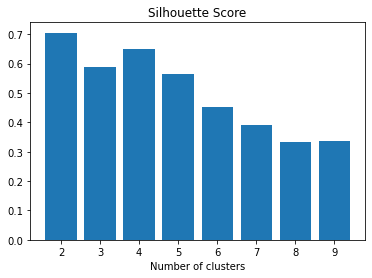

In [91]:
plt.bar(range(2,10), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")